# Homework 2: Convolutions and Spike Trains
## Due: Tuesday, December 17, 11:59pm

## Part 1: Convolutions

### Math Exercises - Convolutions

The first portion of this homework assignment contains mathematics questions related to the topics covered this week (Convolutions and Filters).
Please write your answers using the Jupyter markup cell’s LaTeX interpreter, or embed a scanned image/pdf of your answers into the markup cell.

More information about LaTeX and Jupyter markdown formatting can be found here:

[https://jupyterbook.org/en/stable/content/math.html](https://jupyterbook.org/en/stable/content/math.html)

And Here:

[https://ashki23.github.io/markdown-latex.html](https://ashki23.github.io/markdown-latex.html)

<a id="question-1"></a>
### Convolving Two Arrays

Given two arrays, $A = [3, 4, 5, 6, 2]$ and $B = [1, 2, 3]$, perform the regular convolution of these arrays. Provide a detailed step-by-step calculation and explain how the convolution changes the characteristics of the original arrays. What is the significance of convolution in signal processing, especially in the context of neural data analysis?

** Your Answer Here **

Response:

So according to the formula of 
$$
(A * B)[n] = \sum_{k=\max(0, n-N+1)}^{\min(M-1, n)} A[k] B[n-k]
$$


when k = 0:
$$
(A * B)[0] = 3*3 = 9
$$


when k = 1:
$$
(A * B)[1] = 3*2 + 4*3 = 6 + 12 = 18
$$

when k = 2:
$$
(A * B)[2] = 3*1 + 4*2 + 5*3 = 3 + 8 + 15 = 26
$$

when k = 3:
$$
(A * B)[3] = 4*1 + 5*2 + 6*3 = 4 + 10 + 18 = 32
$$

when k = 4:
$$
(A * B)[4] = 5*1 + 6*2 + 2*3 = 5 + 12 + 6 = 23
$$

when k = 5:
$$
(A * B)[4] = 6*1 + 2*2 = 6 + 4 = 10
$$

when k = 6:
$$
(A * B)[4] = 2*1 = 2
$$



so (A * B) = [9, 18, 26, 32, 23, 10, 2]


From what I know, the convolutional agorithm is a kind of filter, like the low-pass or high-pass, which can be used to filter noise. 


It also can be used to smooth the vector, like the kernel of "[1, 1, 1]/3" or gaussian kernal. 

For the artifical nueral network, the kernel can be trained for different nueral, like CNN. I am not sure what kind of biological neural data it can be applied, but usually, if I want to filter a certain frequency or smooth the data, it can be used. 










### Convolving Two Signals with an FFT

Consider two discrete-time signals, $X[n]$ and $Y[n]$, each with a length of 1000 points. Write an expression for convolving these signals using the Fast Fourier Transform (FFT) method. Compare the computational complexity of this method with the direct convolution method. Why is FFT-based convolution particularly beneficial in the context of processing large neural datasets?

** Your Answer Here **

Response:

As above, if N = 1000 for X and Y, if use the formular in the Qestion 1, the complexity will be $ O(N^2) $


But if using the FFT (and IFFT), according to wiki (https://en.wikipedia.org/wiki/Fast_Fourier_transform), the complex is about $ O(n logn)$
(I am sure exactly why it is that). Anyway, The convolution $ Z[n] = X[n] * Y[n] $ can be computed using FFT as follows:
Step1: For X, we just pad with 0, while for Y, we need to pad with 0 and reverse or flip it, so the length of both X and Y will be 1000 + 1000 - 1 = 1999


Step2: then apply FFT to both padded siganls:  
$$ X_f = FFT(X_p) $$
and 
$$ Y_f = FFT(X_p) $$

Step3: multiple both signal:
$$
Z_f = X_f * Y_f
$$

Step4, finally use ifft to get Z
$$
Z[n] = IFFT(Z_f)
$$

So the for the second step, the complexity is $ O(1999*log1999)$ for x and y separately, and for the step3, the complexity is O(1999), and Ifft is the same of $ O(1999*log1999) $

So the complexity is about $ O(1999*log1999)$, which is much smaller than $ O(1000^2)$. Therefore, FFT-based convolutional method is faster and time-effective to process the long signal. 





### Moving Average Filter

You have a signal $S = [2, 3, 4, 5, 6, 7, 8, 9, 10]$. Calculate the moving average of this signal using a Finite Impulse Response (FIR) filter with a window size of 3. Show your calculations in detail. Discuss the effect of the moving average filter on the signal, particularly in terms of smoothing and latency. How does this apply to neural signal processing?

** Your Answer Here **

Response:

So the FIR kernel will be [1,1,1]/3


In order to get the filtered signal using FIR,  the process is within window size of 3 and details as follows:

$$
S_{filter} = [2,3,4]/3 + [3,4,5]/3 + [4, 5,6]/3 + [5,6,7]/3 + [6,7,8]/3 + [7,8,9]/3 + [8,9,10]/3 = [3, 4, 5, 6, 7, 8, 9]
$$


Regarding smoothing, the result is similar to the orgianl signal after using FIR, the differece is the no the first and last value, which is a bit smooth the signal. Bascailly, it is a filter to make line smooth (although the smooth degree is not as good as gausian kernel). 

Regarding latency, because the first value is 3 which is the second position in the orginal signal, so it shifts one time step to the right as compared to the orginal one. Probably, if using the gausan kernal (longer than 3 in length), the shift will high (according to the equation of $ (length - 1)/2 $ )


Regarding the application of neural signal processing, because it is one dimensional process, it can be used to EEG to filter nosie. After filter the nosie, it is better to extract the features, like the duration of a specific event. 






### Programming Exercises

In the following cells, you will write python code to manipulate and analyze an EEG signal, in order to gain insights about what is contained in the signal.

You are provided with 10 EEG recordings containing an ERP. These 10 recordings are in the file named "eeg_signals.pkl". You are also provided with a file called "erp_timestamps.txt", which contain the timestamps for the ERPs in the 10 signals.

You are also provided with an 11th EEG recording, in which you will try to locate the ERP. No timestamp is provided for this recording. This recording is saved in the file called "eeg_signal_to_analyze.pkl".

### Utilize the Convolution Operator From Standard Libraries
Show using Python's `numpy.convolve`
that convolution is a commutative operator.

In [5]:
# Your Code Here

# response: Suppose I have two vector of x and y, x = [1, 2, 3, 4, 5] and y = [[3,7,5,3]
X = [1, 2, 3, 4, 5]
Y = [3, 7, 5, 3]

# we need to show and x * y equal to y * x
import numpy as np
X = np.array(X)
Y = np.array(Y)

XY_conv = np.convolve(X, Y, mode='full')
print('XY_conv:', XY_conv)

YX_conv = np.convolve(Y, X, mode='full')
print('YX_conv:', YX_conv)



XY_conv: [ 3 13 28 46 64 64 37 15]
YX_conv: [ 3 13 28 46 64 64 37 15]


Conclusion: Becaue the result are the same, so convolution is a commutative operator

### Write Your Own Convolution Function
Convolve these two signals first with the mentioned functions, and then with your
own code. Write a function that convolves two signals without using any external libraries' built-in convolution function (more general functions such as `np.dot` are permissable).

`x = [1 5 7 9 3 3 3 9 8] ; y = [1 3]`

The convolution should be done in the 'full' mode, meaning that all possible
multiplications of these signals should occur. Remember, The definition of
convolution is: $(x*y)[n] = \sum_{n \in \mathbb{Z}}{x[m] y[m-n]}$. Additionaly,
take note that Matlab flips the second vector that enters the `conv`
function.

In [105]:
# Your Code Here

import numpy as np


def my_conv_function(x, y):
    # no flip of y
    x_len = len(x)
    y_len = len(y)
    total_len = x_len + y_len - 1
    result = np.zeros(total_len)

    for i in range(total_len): 
        for j in range(x_len): 
            if 0 <= i - j < y_len:  # make sure the index is in the range of y
                result[i] += x[j] * y[i - j]
    
    return result


# test
x = [1, 5, 7, 9, 3, 3, 3, 9, 8]
y = [1, 3]
my_result = my_conv_function(x, y)
print('my_result (no flip):', my_result)


# check if it is the same with numpy
np_result = np.convolve(x, y, mode='full')
print('np_result:', np_result)


# I check when flipping the y, the result will be different, but it is the same with the maual calculation
def my_conv_function_flip(x, y):
    x_len = len(x)
    y_len = len(y)
    total_len = x_len + y_len - 1
    result = np.zeros(total_len)

    # **Flip y
    y_flipped = y[::-1]

    for i in range(total_len):
        for j in range(x_len):
            if 0 <= i - j < y_len:
                result[i] += x[j] * y_flipped[i - j]
    
    return result

print('my_conv_function_flip:', my_conv_function_flip(x, y))


# I tried scipy.signal because it is faster, and I use it more often
from scipy.signal import convolve, correlate

print('scipy.signal.convolve:', convolve(x, y, mode='full')) 
print('scipy.signal.correlate:', correlate(x, y, mode='full')) # the correlation algorthm

    

my_result (no flip): [ 1.  8. 22. 30. 30. 12. 12. 18. 35. 24.]
np_result: [ 1  8 22 30 30 12 12 18 35 24]
my_conv_function_flip: [ 3. 16. 26. 34. 18. 12. 12. 30. 33.  8.]
scipy.signal.convolve: [ 1  8 22 30 30 12 12 18 35 24]
scipy.signal.correlate: [ 3 16 26 34 18 12 12 30 33  8]


Comment: it seems the different is correlatie agorithm require to flip y

<a id="question-5"></a>
### Loading the Data

Write a script to load the 10 EEG recordings located in the "eeg_signals.pkl" file. Once loaded, create visualizations for all of the recordings in both the time and frequency domains. Discuss any notable features you observe in these domains. How do these visualizations help in understanding the EEG recordings?

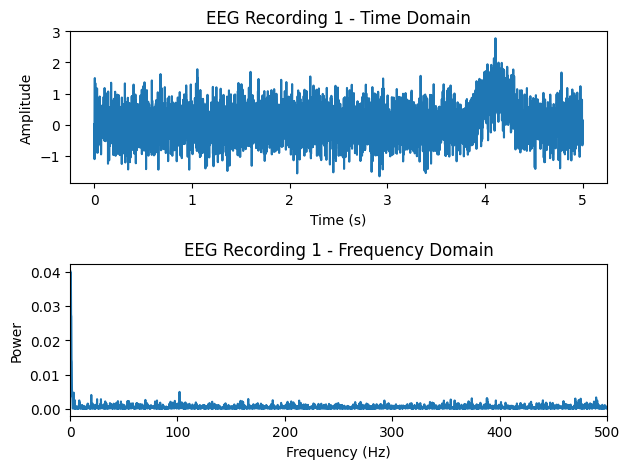

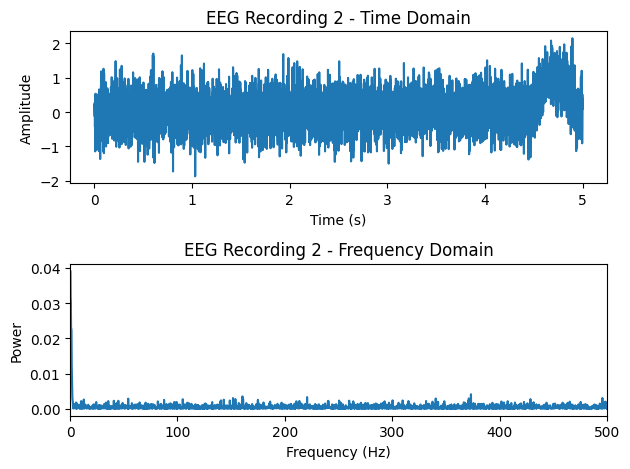

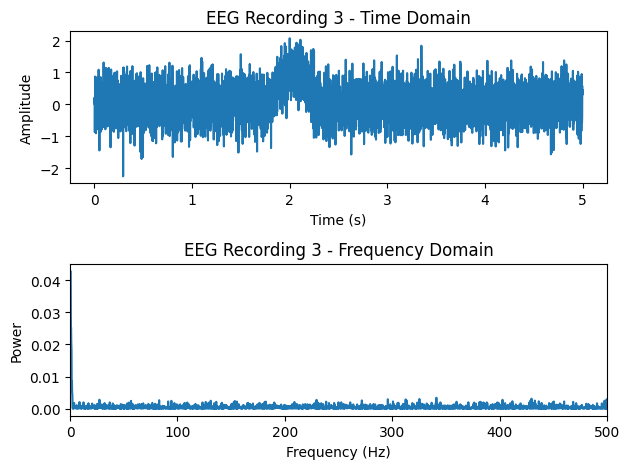

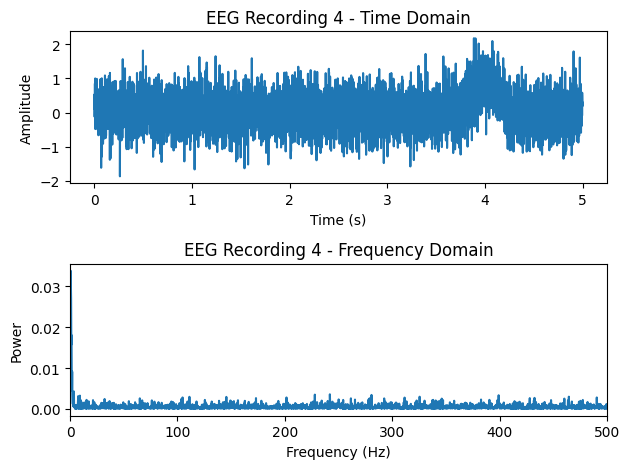

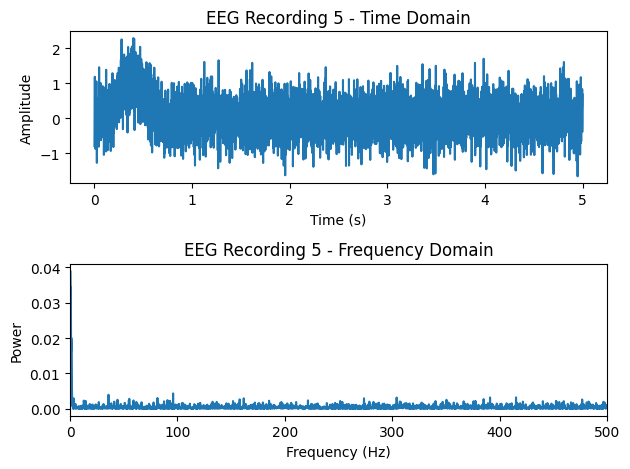

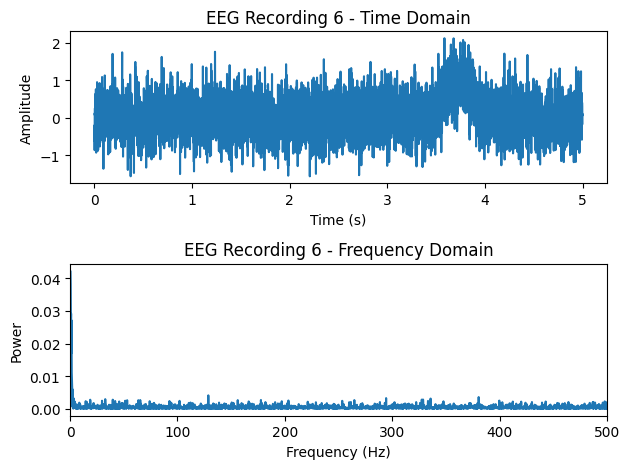

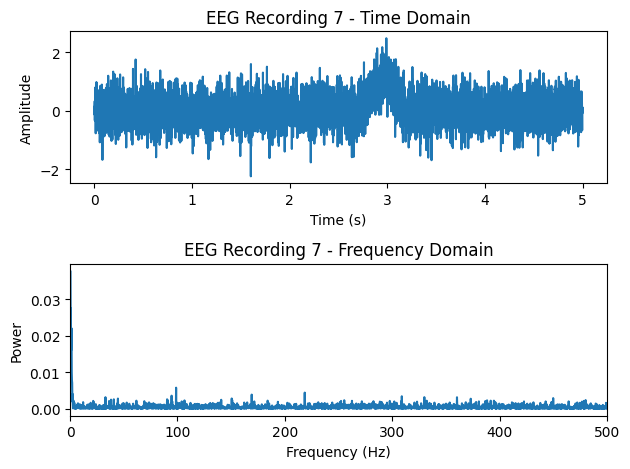

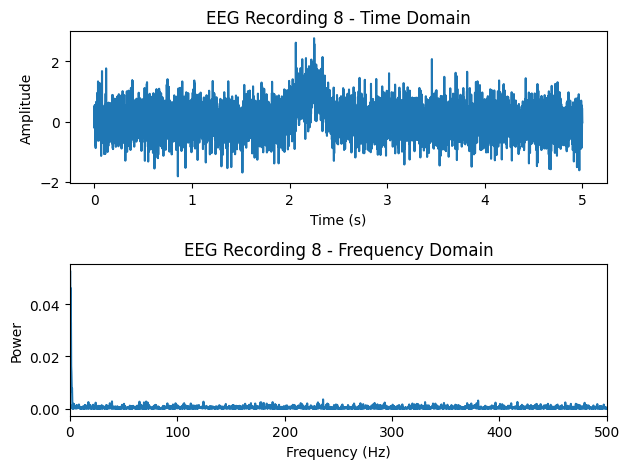

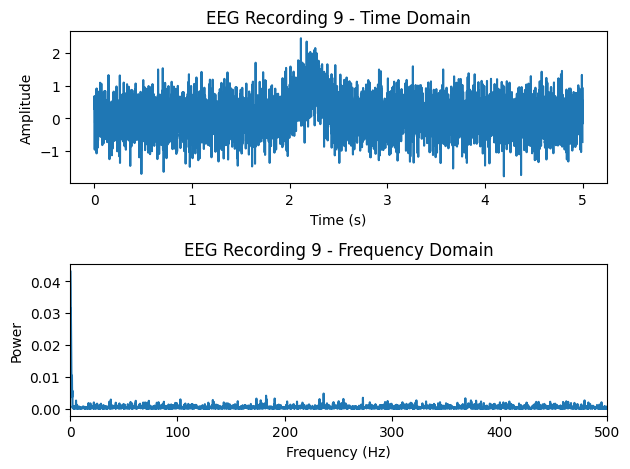

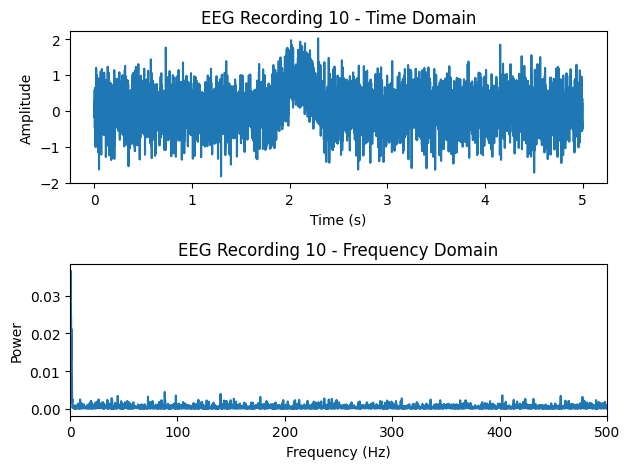

In [106]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# load the file
file_path = 'eeg_signals.pkl' 
with open(file_path, 'rb') as f:
    eeg_signals = pickle.load(f)

# plotting
# suppose the fs = 1000 Hz for all the signals in the pkl file
fs = 1000
for i, eeg_data in enumerate(eeg_signals):
    time = np.arange(len(eeg_data)) / fs

    # plot waveform
    plt.figure()
    plt.subplot(2, 1, 1)
    plt.plot(time, eeg_data)
    plt.title(f'EEG Recording {i + 1} - Time Domain')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    # plot frequency domain
    plt.subplot(2, 1, 2)
    frequencies, amplitudes = signal.periodogram(eeg_data, fs=fs)
    plt.plot(frequencies, amplitudes)
    plt.title(f'EEG Recording {i + 1} - Frequency Domain')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power')
    plt.xlim(0, fs / 2)

    plt.tight_layout()
    plt.show()

** Your Explanation Here **

According to the graph above, there is specific one peak at specific time domain, for example, the first signal had peak at 4.1-4.5 seconds if the fft is 1000. Notely, there are 4 signals had peaks at around 2 seconds. 


According to the frequency plot, almost all the high frequency signal has low power, which means they are probabaly noise. The meaningful signal is in the low frequency part, not high one.


### Creating ERP Template

Write a script to average the 10 EEG recordings, aligning them based on the known timestamps of the Event-Related Potentials (ERP). This will create an idealized template of the ERP. Plot the resulting averaged ERP and discuss its characteristics. How does averaging help in identifying the features of the ERP? Discuss any potential issues that might arise from this method.


average_eeg_signal: [-0.0115447  -0.03556916 -0.10764747 ...  0.04609549  0.06839396
  0.05873775]
[3.870774154830966, 4.458891778355671, 1.8043608721744349, 3.74374874974995, 0.1370274054810962, 3.4666933386677337, 2.6995399079815963, 1.9553910782156432, 1.9833966793358673, 1.851370274054811]


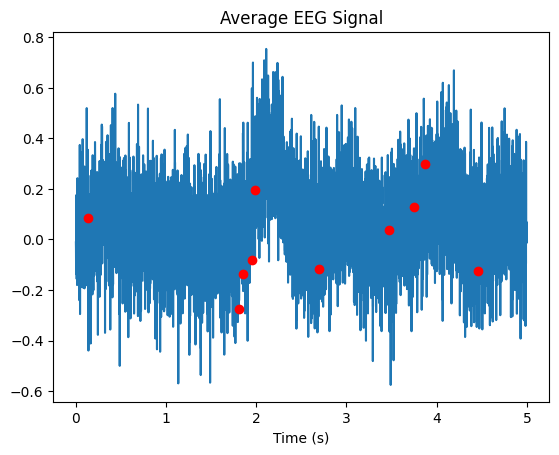

In [108]:
import pickle
import numpy as np
import matplotlib.pyplot as plt


# Load EEG data and ERP timestamps
eeg_file = './eeg_signals.pkl'
timestamps_file = './erp_timestamps.txt'
fs = 1000  # Hz

with open(file_path, 'rb') as f:
    eeg_signals = pickle.load(f)

with open(timestamps_file, 'r') as f:
    erp_timestamps = [float(line.strip()) for line in f]  # convert string to floats

average_eeg_signal = np.mean(eeg_signals, axis=0)
print('average_eeg_signal:', average_eeg_signal)
print('erp_timestamps: ', erp_timestamps)

# plot the average EEG signal
time = np.arange(len(average_eeg_signal)) / fs
plt.figure()
plt.plot(time, average_eeg_signal)
plt.title('Average EEG Signal')
plt.xlabel('Time (s)')

# add dot for each ERP timestamp
for timestamp in erp_timestamps:
    plt.plot(timestamp, average_eeg_signal[int(timestamp * fs)], 'ro')

plt.show()


** Your Explanation Here **

According the plot as above, the eeg waveform has two peaks, one is at about 2s, and another is near 4s. This is consistent with erp_timestamps with 4 points nearby 2s, and 3 points nearby 4s. So bascially, the average plot show the features from 7 signals, and other 3 signals are not obvious, which be the potential issue. Maybe it is better to check the signal one by one before doing the average. 

<a id="question-8"></a>
### Matched Filter Convolution

Use the ERP template created in the previous question to perform a matched filter convolution with the new EEG recording (the one where the ERP location is unknown). Write a script that implements this convolution and identify where in the recording the ERP is most likely to occur. Provide a plot showing the convolution output and indicate the location of the ERP. Discuss how the matched filter approach helps in detecting the ERP and any limitations or challenges of this method.

**Use your convolution function from the previous steps**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


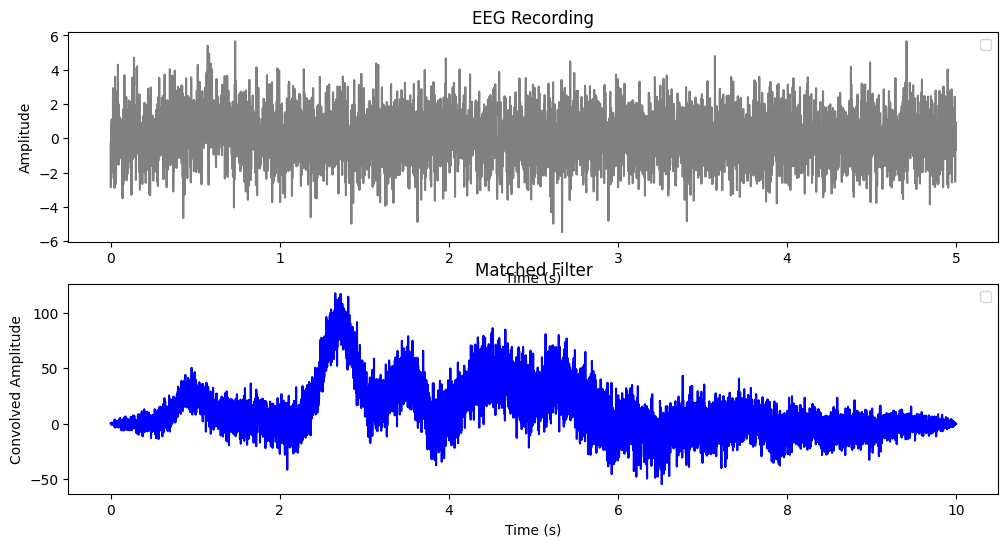

In [109]:
import pickle
import numpy as np
import matplotlib.pyplot as plt


# copy the function from the previous cell
def my_conv_function(x, y):
    # no flip of y
    x_len = len(x)
    y_len = len(y)
    total_len = x_len + y_len - 1
    result = np.zeros(total_len)

    for i in range(total_len): 
        for j in range(x_len): 
            if 0 <= i - j < y_len:  # make sure the index is in the range of y
                result[i] += x[j] * y[i - j]
    
    return result


erp_template = average_eeg_signal
unknown_eeg_file = './eeg_signal_to_analyze.pkl'


# Load the new EEG recording
with open(unknown_eeg_file, 'rb') as f:
    eeg_query = pickle.load(f)

# Sampling frequency (assumed)
fs = 1000  # Hz

convolve_result = my_conv_function(eeg_query, erp_template)

# Time vector for EEG recording and convolution output
time_eeg = np.arange(len(eeg_query)) / fs
time_conv = np.arange(len(convolve_result)) / fs

# Plot the EEG recording and the matched filter output
plt.figure(figsize=(12, 6))

# Plot the EEG recording
plt.subplot(2, 1, 1)
plt.plot(time_eeg, eeg_query, color='gray')
plt.title("EEG Recording")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()

# Plot the matched filter output
plt.subplot(2, 1, 2)
plt.plot(time_conv, convolve_result, color='blue')
plt.title("Matched Filter")
plt.xlabel("Time (s)")
plt.ylabel("Convolved Amplitude")
plt.legend()


** Your Explanation Here **

Response:
As the figure above, the orignal one has no clear peak, but after using the matched-filter, we can see a clear peak at around 2.5 s. It means the ERP template is a good kernel
to detect the query signal because they have the similar pattern. Moreover, the matched-filter method can filter noise, which makes the peak more clear.

The problem will be if the template is not closely match the query signal, the detection will decrease. 

So make sure the event occured at 2.5 s is the result you want, and this average template coupled with matched-filter method will help you filter noise and detect the event more clearly.


## Part 2: Poisson Spike Trains

In this question we'll create and work with a spike train. The idea is to create a set of functions that can be used for your spike train analysis pipeline. These function should be reusable. The functions or modules you should define are:

- `readPoiSpikes`
- `generatePoiSpikes`
- `calcFF`
- `calcCV`
- `alcRate`

In this week's directory in the GitRepo,  there are two spiketrain datasets named `rawSpikes1.mat` and `rawSpikes2.mat`. They both should be placed into 1 ms bins. The spike times there are in milliseconds.

**Write each function inside a jupyter code cell or python file. Upload a PDF to your gitrepo of the outputs of each of your functions for both the provided spike trains and the one you generate.

Use the following parameters to test out your code:

```python
r = 94 #spikes per second
Fs = 1e3 #Sampling frequency
totalTime = 30 #seconds
dt = 0.001 #seconds
binSize = 0.01 #seconds
```

#### Load Data

Write a function that loads a dataset in the format of the spike train files in this gitrepo and outputs it as a spike train with a set binwidth. The function has to be able to read both column and row vectors, and should be robust to empty datasets.

```python
def readPoiSpikes(fileName, Fs):

    # your code here
    
    return spikeTrain
```

In [110]:

import numpy as np
from scipy.io import loadmat

### view the keys of the mat file
# mat_data = loadmat('./rawSpikes1.mat')
# print(mat_data.keys())


def readPoiSpikes(fileName, Fs):
    mat_data = loadmat(fileName)
    spike_data = mat_data['spikes'].flatten()
    total_bins = int(spike_data[-1] * Fs / 1000) + 1 # it seems +1 is needed
    # print('total_bins:', total_bins)    
    spikeTrain = np.zeros(total_bins) # initialize the spike train like in Matlab
    spike_indices = (spike_data * Fs / 1000).astype(int) 
    spikeTrain[spike_indices] = 1

    return spikeTrain

Fs = 1e3 #Sampling frequency
spikes_1 = readPoiSpikes('./rawSpikes1.mat', Fs)
spikes_2 = readPoiSpikes('./rawSpikes2.mat', Fs)

print('spikes_1:', spikes_1)
print('spikes_2:', spikes_2)



spikes_1: [0. 0. 0. ... 0. 0. 1.]
spikes_2: [0. 0. 0. ... 0. 0. 1.]


#### Generate Spike Trains

Write a function that generates a spike train, according to the Poisson process model and the explanation that was given in the exercise, under the "Poisson Generator" section. This function should run only if we didn't load a spike train earlier (don't just comment out the previous function). Here we assume $r(t)=r$ and
$P(\text{spike occurred}) = r\Delta t$ for short $\Delta t$. That means that we're considering a homogeneous process in this case. Make sure all operations are done in a vectorized manner, no loops!

```python
def generatePoiSpikes(r, dt, totalSize):

    # your code here

    return spikeTrain
```

In [113]:
import numpy as np

def generatePoiSpikes(r, dt, totalSize):
    # because homogeneous Poisson process required, the spike probability is constant
    spike_prob = r * dt

    random_numbers = np.random.rand(totalSize)
    
    # only when the prob > random number, the spike will be generated
    spikeTrain = (random_numbers < spike_prob)
    
    return spikeTrain.astype(int) # convert to 0 or 1

r = 94 #spikes per second
Fs = 1e3 #Sampling frequency
totalTime = 30 #seconds
dt = 0.001 #seconds
binSize = 0.01 #seconds


totalSize = int(totalTime / dt)
spike_train = generatePoiSpikes(r, dt, totalSize)
print("spike_train", spike_train, spike_train.shape)


spike_train [1 0 0 ... 0 0 1] (30000,)


#### Fano Factor and Coefficient of Variation

After we have a spike train at hand, we want to check whether the spikes are indeed Poisson-distributed. The two ways to check it were discussed in class: the Fano Factor and Coefficient of Variation. Write two functions that check these parameters for the spike trains.

Calculate the CV and FF of the two given spike trains and the one you generated. Consider carefully how to calculate the FF of a **single** spike train.

```python
def calcCV(spikeTrain):

    # your code here
    
    return CV
```


```python
def calcFF(spikeTrain):

    # your code here
    
    return FF
```

In [86]:
# bothe CV and FF are used to measure the regularity of the spike train
def calcCV(spikeTrain, dt=0.001):
    # isi: Inter-Spike Interval
    spike_indices = np.where(spikeTrain == 1)[0]
    isi = np.diff(spike_indices)
    cv = np.std(isi) / np.mean(isi)
    
    return cv

def calcFF(spikeTrain, binSize=0.01, dt=0.001):
    num_bins = int(len(spikeTrain) * dt / binSize)

    spike_counts = np.zeros(num_bins) # init
    for i in range(num_bins):
        start = int(i * binSize / dt)
        end = int(min((i + 1) * binSize / dt, len(spikeTrain)))
        spike_counts[i] = np.sum(spikeTrain[start:end])

    ff = np.var(spike_counts) / np.mean(spike_counts)

    return ff



# r = 94 #spikes per second
# Fs = 1e3 #Sampling frequency
# totalTime = 30 #seconds
dt = 0.001 #seconds
binSize = 0.01 #seconds


print('spike_train CV:', calcCV(spike_train, dt))
print('spike_train FF:', calcFF(spike_train, binSize, dt))


# print('CV:', calcCV(spikes_1, dt))
# print('FF:', calcFF(spikes_1, binSize, dt))

# print('CV:', calcCV(spikes_2, dt))
# print('FF:', calcFF(spikes_2, binSize, dt))

spike_train CV: 0.924064282928078
spike_train FF: 0.8754289093920037


#### Rate of fire

Lastly we'll check the rate of fire of our neurons. The function should receive a spike train and length of the window in which it should calculate the rate. Length = 0 means that it should just return the average rate of fire of the whole train. A different window requires you to calculate the firing rate in that window, and plot the results over time - $r(t)$. Make sure the function is robust for all types of inputs. Calculate the rate of fire for the two given spike trains and the one you generated

```Python
def calcRate(spikeTrain, window, dt):

    # your code here
    
    return rateOfFire
```

average rate for the whole train:  96.33333333333333


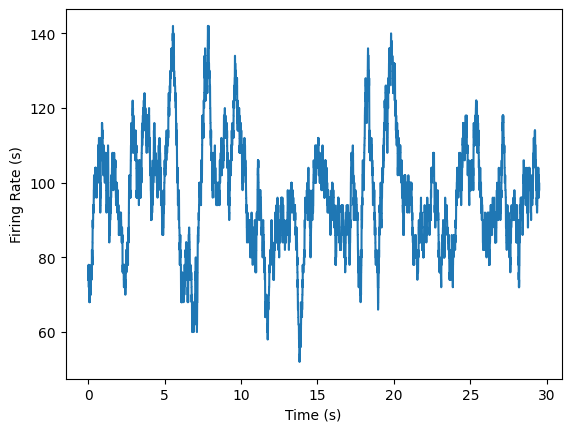

average_rate_1: 60.71682886304296
average_rate_2: 99.62143853357242


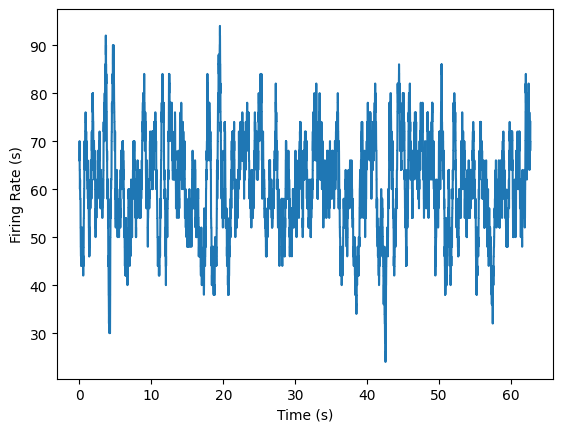

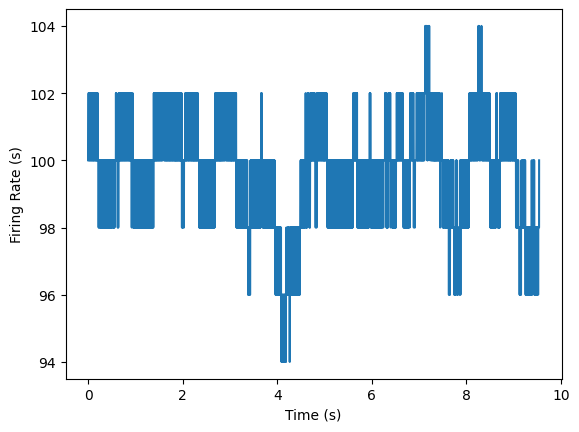

rates_1: [66. 66. 68. ... 72. 72. 74.]
rates_2: [100. 100. 100. ...  98.  98. 100.]


In [103]:
import numpy as np
import matplotlib.pyplot as plt


def calcRate(spikeTrain, window, dt):
    # convert to numpy array regardless of the input type
    spikeTrain = np.array(spikeTrain)

    num_steps = len(spikeTrain)
    total_time = num_steps * dt

    # when window = 0 
    if window == 0:
        total_spikes = np.sum(spikeTrain)
        mean_rate = total_spikes / total_time
        return mean_rate

    assert window > 0, 'window should be greater than 0'

    window_size = int(window / dt)
    num_windows = num_steps - window_size + 1

    rates = np.zeros(num_windows) # init
    for i in range(num_windows):
        start = i 
        end = i + window_size
        rates[i] = np.sum(spikeTrain[start:end]) / window

    return rates


def plotting(rates, num_steps, dt):
    # plotting
    time_axis = np.arange(num_steps) * dt

    plt.figure()
    plt.plot(time_axis, rates)
    plt.xlabel('Time (s)')
    plt.ylabel('Firing Rate (s)')
    plt.show()


# test
r = 94 #spikes per second
Fs = 1e3 #Sampling frequency
totalTime = 30 #seconds
dt = 0.001 #seconds
binSize = 0.01 #seconds


totalSize = int(totalTime / dt)

spike_train = generatePoiSpikes(r, dt, totalSize) # from the last question

# when window = 0
window = 0
rate = calcRate(spike_train, window, dt)
print('average rate for the whole train: ', rate)

# when window > 0
window = 0.5 # 1s
rates = calcRate(spike_train, window, dt)
# show the rates
plotting(rates, len(rates), dt)

# different inputs:
rawSpikes1 = readPoiSpikes('rawSpikes1.mat', Fs=1000)
rawSpikes2 = readPoiSpikes('rawSpikes2.mat', Fs=1000)

# when window = 0
average_rate_1 = calcRate(rawSpikes1, 0, dt)
average_rate_2 = calcRate(rawSpikes2, 0, dt)
print('average_rate_1:', average_rate_1)
print('average_rate_2:', average_rate_2)

    
# when window > 0
window = 0.5 # 1s
rates_1 = calcRate(rawSpikes1, window, dt)
plotting(rates_1, len(rates_1), dt)
rates_2 = calcRate(rawSpikes2, window, dt)
plotting(rates_2, len(rates_2), dt)
